In [1]:
!pip install tensorflow-ranking==0.5.0
!pip install tensorflow==2.9.1
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 719.8 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Unin

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.9.1


**Importing  libraries**

In [2]:

import pandas as pd
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications as cnns
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC
from tensorflow_addons.metrics import F1Score
from keras.models import Model
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.9.1


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

### Resampling for Imbalanced Dataset

In this code  the objective is to address the issue of class imbalance in a dataset through resampling. Specifically, it aims to balance the class distribution of the `Disease_Risk` variable in the training dataset.

#### Data Preparation

- The code reads three CSV files: `train_file.csv`, `val_file.csv`, and `test_file.csv`, which likely contain data related to disease risk.

- The training dataset is divided into majority and minority classes based on the `Disease_Risk` variable. The majority class represents cases with `Disease_Risk` equal to 1, while the minority class represents cases with `Disease_Risk` equal to 0.

- The validation and test datasets are loaded and also classified into majority and minority classes.

#### Resampling

- The primary objective is to balance the class distribution in the training dataset. To achieve this, the `resample` function from `sklearn.utils` is used.

- A parameter, `desired_majority_samples_train`, is specified as the desired number of samples for the majority class (class 1) in the training dataset. This parameter can be adjusted based on your needs.

- Resampling is performed using the `resample` function, which randomly samples from the majority class to achieve the desired number of samples while keeping the minority class unchanged. The `random_state` parameter ensures reproducibility.

- The training dataset is then updated by concatenating the resampled majority class with the original minority class.

#### Class Distribution

- The code calculates the class distribution for the `Disease_Risk` variable in the training and validation datasets.

- The class distribution is printed to the console to provide insights into the balance achieved by resampling.

This code  is essential for addressing class imbalance issues in machine learning tasks, ensuring that the model is not biased toward the majority class. Balancing the class distribution is a crucial step in building fair and accurate models.


In [4]:
from sklearn.utils import resample
train_data = pd.read_csv('/kaggle/input/my-data/train_file.csv')
val_data = pd.read_csv('/kaggle/input/my-data/val_file.csv')
test_data = pd.read_csv('/kaggle/input/my-data/test_file.csv')
train_data_majority_class = train_data[train_data['Disease_Risk'] == 1]
val_data_majority_class = val_data[val_data['Disease_Risk'] == 1]
test_data_majority_class = test_data[test_data['Disease_Risk'] == 1]
train_data_minority_class = train_data[train_data['Disease_Risk'] == 0]
val_data_minority_class = val_data[val_data['Disease_Risk'] == 0]
test_data_minority_class = test_data[test_data['Disease_Risk'] == 0]
desired_majority_samples_train = 1528

undersampled_majority_train = resample(train_data_majority_class, n_samples=desired_majority_samples_train, random_state=42)

train_data = pd.concat([train_data_minority_class, undersampled_majority_train])

train_distribution = train_data['Disease_Risk'].value_counts(normalize=True)

val_distribution = val_data['Disease_Risk'].value_counts(normalize=True)

print("Train Distribution:\n", train_distribution)

print("\nValidation Distribution:\n", val_distribution)


Train Distribution:
 Disease_Risk
1    0.79212
0    0.20788
Name: proportion, dtype: float64

Validation Distribution:
 Disease_Risk
1    0.791602
0    0.208398
Name: proportion, dtype: float64


In [5]:
len(train_data),len(val_data),len(test_data)

(1929, 643, 643)

### Computing Class Weights for a Balanced Dataset

In this code  class weights are computed for a balanced dataset. Class weights play a crucial role in addressing class imbalance during the training of machine learning models.

#### Class Weight Calculation

- The code employs the `compute_class_weight` function from `sklearn.utils.class_weight` to determine class weights.

- The weighting strategy chosen is `'balanced'`. This strategy automatically computes class weights inversely proportional to the class frequencies within the training dataset. As a result, more importance is given to the minority class.

- The classes are defined as `[0, 1]`, where 0 corresponds to the minority class (e.g., indicating no disease risk), and 1 corresponds to the majority class (e.g., indicating disease risk).

- The computed class weights are stored in the `class_weights_balanced` variable, representing the weights for both class 0 and class 1.

- These class weights are then organized into a dictionary known as `class_weight_dict_balanced`. The dictionary structure includes class labels (0 and 1) and their corresponding calculated class weights.

By incorporating these class weights, machine learning models can be trained to provide equal significance to both classes, thus enhancing model performance on imbalanced datasets.



In [6]:
from sklearn.utils.class_weight import compute_class_weight

class_weights_balanced = compute_class_weight('balanced', classes=[0, 1], y=train_data['Disease_Risk'])
class_weight_dict_balanced = {0: class_weights_balanced[0], 1: class_weights_balanced[1]}

In [7]:
# Conversion of Integer labels to String labels for train, test, and validation sets.
train_data["Disease_Risk"] = train_data["Disease_Risk"].astype(str)
test_data["Disease_Risk"] = test_data["Disease_Risk"].astype(str)
val_data["Disease_Risk"] = val_data["Disease_Risk"].astype(str)

### Data Preprocessing and Image Augmentation

In this code  data preprocessing and image augmentation are applied to facilitate the training and validation of machine learning models using retinal images.

#### Data Preprocessing

- The code defines `input_size` as `(224, 224)`, which represents the desired size for the input images.

- Three separate `ImageDataGenerator` instances are created using TensorFlow's Keras library. These generators help preprocess and augment the images for training, validation, and testing.

#### Image Augmentation

- The `ImageDataGenerator` instances `train_gen`, `val_gen`, and `test_gen` are initialized with a preprocessing function called `preprocess_input`. This function is essential for efficient image preprocessing.

- For training images, the code sets up a generator named `train_images`. It uses `flow_from_dataframe` to load the training data from a DataFrame (`train_data`) and associates it with the corresponding retinal images.

- The `x_col` parameter specifies the column containing image file paths, the `y_col` parameter specifies the column with the target labels (in this case, "Disease_Risk").

- `target_size` sets the desired image size.

- `color_mode` is set to 'rgb' to indicate that the images are in color (Red, Green, Blue).

- The `batch_size` is configured as 32.

- `class_mode` is set to "binary" since it's a binary classification task.

- The `shuffle` parameter is set to `False` to ensure that the images are loaded in the same order as they appear in the DataFrame.

- Similar configurations are applied to create generators for validation and testing images, named `val_images` and `test_images`.

This code sets the stage for efficient data preprocessing and augmentation, which is crucial for building robust machine learning models that can effectively classify retinal images based on disease risk.



In [8]:

cnn_variant = cnns.densenet
input_size=(224,224)
train_genD = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input,
)

test_genD = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input
)

val_genD = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=cnn_variant.preprocess_input
)

# Preprocess images
train_imagesD = train_genD.flow_from_dataframe(
    train_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

val_imagesD = val_genD.flow_from_dataframe(
    val_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_imagesD = test_genD.flow_from_dataframe(
    test_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    color_mode='rgb',
    target_size=input_size,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1929 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.


In [9]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
input_size=(224,224)
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Preprocess images
train_images = train_gen.flow_from_dataframe(
    train_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

val_images = val_gen.flow_from_dataframe(
    val_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    target_size=input_size,
    color_mode='rgb',
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_images = test_gen.flow_from_dataframe(
    test_data,
    x_col="IMG_DIR", 
    y_col="Disease_Risk",
    color_mode='rgb',
    target_size=input_size,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1929 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.


### Model Loading

In this code  pre-trained deep learning models are loaded for further use.

#### Model Loading Description

- The code uses the `load_model` function from TensorFlow's Keras library to load pre-trained deep learning models.
  
- Two models with custom names, `model1` and `model2`, are loaded from specified file paths. These models have been previously trained and saved for future use.

- The provided file paths lead to the saved model files, allowing them to be loaded back into memory.

#### Model Utilization

Once the models are loaded, they can be utilized for various tasks, such as making predictions, performing evaluations, or fine-tuning for specific applications.


In [10]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/input/models/D/1/Best_DenseNet201_detector.h5')


model2  = load_model('/kaggle/input/models/D/2/dectectorEfficientNetV2s.h5')


In [11]:
model1_predictions = model1.predict(val_imagesD)
model2_predictions = model2.predict(val_images)


21/21 [==============================] - 9s 273ms/step


In [12]:
labels_val = val_imagesD.labels
y_true = np.array(labels_val)

In [13]:
ensemble_predictions = np.hstack((model1_predictions, model2_predictions))

### Stacking Model Creation and Compilation

In this code a stacking model is created and compiled for ensemble learning.

#### Model Creation

- A MirroredStrategy is created to enable distributed training if needed. This strategy can be used to train models across multiple devices or GPUs simultaneously, enhancing training speed and performance.

- Within the MirroredStrategy scope, the stacking model architecture is defined. The model is designed to take input with a specified shape.

- The model architecture includes several layers:
    - A flatten layer to reshape the input data.
    - Two dense layers with ReLU activation functions and dropout layers for regularization.
    - A final dense layer with a sigmoid activation function, designed for binary classification.

- Each layer is named appropriately for clarity.

- The stacking model is instantiated and named 'Stacking_Model1'.

#### Model Compilation

- After defining the model's architecture, it is compiled using the specified optimizer ('adam'), loss function ('binary_crossentropy' for binary classification), and evaluation metrics. The model uses standard evaluation metrics like binary accuracy, precision, recall, AUC, and F1-score.

- This stacked model is now ready for training and ensemble learning.



In [14]:

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    inputs = Input(shape=ensemble_predictions.shape[1], name='input_layer')


    x = Flatten(name='flatten_layer')(inputs)


    x = Dense(128, activation='relu', name='dense_layer_1')(x)
    x = Dropout(0.5, name='dropout_1')(x)


    x = Dense(64, activation='relu', name='dense_layer_2')(x)
    x = Dropout(0.3, name='dropout_2')(x)

    predictions = Dense(1, activation='sigmoid', name='output_layer')(x)


    stacking_model = Model(inputs=inputs, outputs=predictions, name='Stacking_Model1')


    stacking_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=[BinaryAccuracy(name="binary_accuracy"),
                               Precision(name="precision"),
                               Recall(name="recall"),
                               AUC(name="auc"),
                              F1Score(num_classes=1, average='micro', threshold=0.5)])

In [15]:
stacking_model.summary()

Model: "Stacking_Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 flatten_layer (Flatten)     (None, 2)                 0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               384       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 1)             

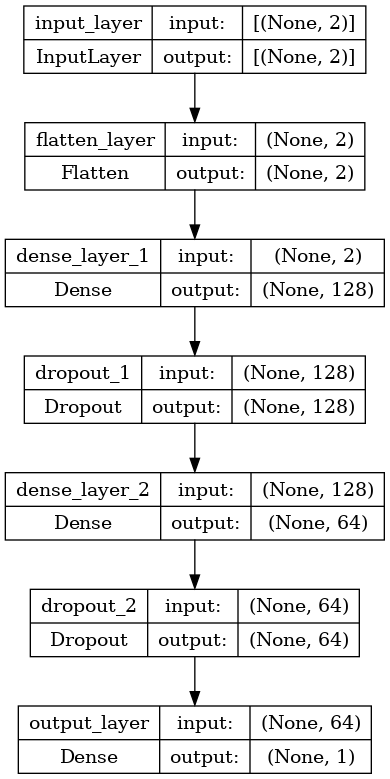

In [16]:
tf.keras.utils.plot_model(stacking_model, show_shapes=True)

In [17]:
stacking_model.fit(ensemble_predictions , y_true, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
21/21 [==============================] - 6s 15ms/step - loss: 0.5075 - binary_accuracy: 0.7574 - precision: 0.7889 - recall: 0.9470 - auc: 0.8622 - f1_score: 0.8607
Epoch 2/50
21/21 [==============================] - 0s 14ms/step - loss: 0.3094 - binary_accuracy: 0.7916 - precision: 0.7916 - recall: 1.0000 - auc: 0.9758 - f1_score: 0.8837
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.2470 - binary_accuracy: 0.8118 - precision: 0.8079 - recall: 1.0000 - auc: 0.9861 - f1_score: 0.8938
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.2191 - binary_accuracy: 0.9253 - precision: 0.9214 - recall: 0.9902 - auc: 0.9750 - f1_score: 0.9545
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.1911 - binary_accuracy: 0.9502 - precision: 0.9492 - recall: 0.9902 - auc: 0.9857 - f1_score: 0.9692
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.1676 - binary_accuracy: 0.9549 - precision: 0

In [18]:
model1_test_predictions = model1.predict(test_imagesD)

21/21 [==============================] - 8s 387ms/step


In [19]:
model2_test_predictions = model2.predict(test_images)

21/21 [==============================] - 5s 226ms/step


In [20]:
ensemble_test_predictions = np.hstack((model1_test_predictions, model2_test_predictions))

In [21]:
final_test_predictions = stacking_model.predict(ensemble_test_predictions)

21/21 [==============================] - 1s 4ms/step


In [22]:
labels_test = test_images.labels
y_true_test = np.array(labels_test)

In [23]:
label_columns=["Not Infected", "Infected"]

### Classification Report Calculation and Evaluation

In this code  a classification report is calculated and evaluated for a binary classification model.

#### Classification Report Calculation

- The code utilizes the `classification_report` function from the Scikit-Learn library to generate a detailed report for evaluating the binary classification model's performance.

- The binary classification model's predictions are compared to the true labels using a predefined threshold (0.5). Predictions exceeding this threshold are considered positive, while those below it are considered negative.

- The resulting binary predictions are stored in the variable `final_test_predictions_binary`.

#### Evaluation and Reporting

- The `classification_report` function takes the true labels (`y_true_test`) and binary predictions (`final_test_predictions_binary`) as input.

- Additional arguments are provided for formatting the report, including `target_names` (label columns), `digits` (number of decimal places), and `zero_division` (the value to use when there is a division by zero in the report).

- The classification report includes various metrics such as precision, recall, F1-score, support, and more for each class. It provides insights into the model's performance.

- The results are printed to the console, providing valuable information on the model's classification performance.

This code is crucial for evaluating and understanding the performance of a binary classification model using a classification report.


In [24]:
from sklearn.metrics import classification_report
threshold = 0.5
final_test_predictions_binary = (final_test_predictions > threshold).astype(int)
print(classification_report(y_true_test, final_test_predictions_binary, target_names=label_columns,digits= 4,zero_division=1))

              precision    recall  f1-score   support

Not Infected     0.8944    0.9478    0.9203       134
    Infected     0.9860    0.9705    0.9782       509

    accuracy                         0.9658       643
   macro avg     0.9402    0.9591    0.9493       643
weighted avg     0.9669    0.9658    0.9661       643



### Confusion Matrix Visualization

In this code  a confusion matrix is calculated and visually represented for evaluating the binary classification model's performance.

#### Confusion Matrix Calculation

- The code utilizes TensorFlow (`tf`) to calculate the confusion matrix. The `confusion_matrix` function takes the true labels (`y_true_test`) and binary predictions (`final_test_predictions_binary`) as input and computes the matrix.

#### Visualization

- The `seaborn` and `matplotlib` libraries are used to create a heatmap visualization of the confusion matrix.

- The heatmap displays the values in the confusion matrix with annotations, allowing for easy interpretation.

- The x-axis represents the predicted labels, while the y-axis represents the actual true labels.

- The heatmap's color scheme (colormap) is specified as 'Blues' to provide a clear visual representation.

- The resulting confusion matrix visualization is displayed using `plt.show()`.


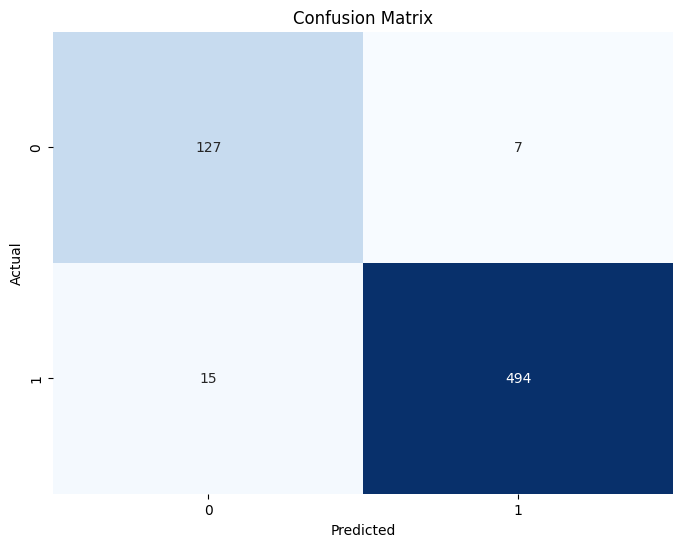

In [25]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = tf.math.confusion_matrix(y_true_test, final_test_predictions_binary, num_classes=2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
evaluation_results = stacking_model.evaluate(ensemble_test_predictions, y_true_test)

21/21 [==============================] - 2s 11ms/step - loss: 0.1095 - binary_accuracy: 0.9658 - precision: 0.9860 - recall: 0.9705 - auc: 0.9860 - f1_score: 0.9782


In [27]:
model_save_path = 'Stacking_ensembleDect.h5'

# Save the model to the specified path
stacking_model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to Stacking_ensembleDect.h5
